In [79]:
#521H0438_NGUYỄN TẤN BẢO 
#REQUIRE 1

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [81]:
df = pd.read_csv('data.csv', encoding = 'unicode_escape')

In [82]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [83]:
df.shape

(2823, 25)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [85]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [86]:
#Ham dien cac gia tri thieu bang cac gia tri xuat hien nhieu lan
def impute_most_frequent_labels(df):
    # List nhung cot co gia tri rong
    columns_to_impute = ["STATE", "POSTALCODE", "TERRITORY"]

    for column in columns_to_impute:
        most_occuring_label = df[column].mode()[0]
        df[column].fillna(most_occuring_label, inplace=True)

    return df

df = impute_most_frequent_labels(df)

In [87]:
df.drop(['ADDRESSLINE2','ORDERDATE','PHONE'],axis=1, inplace = True)

In [88]:
# Visualize

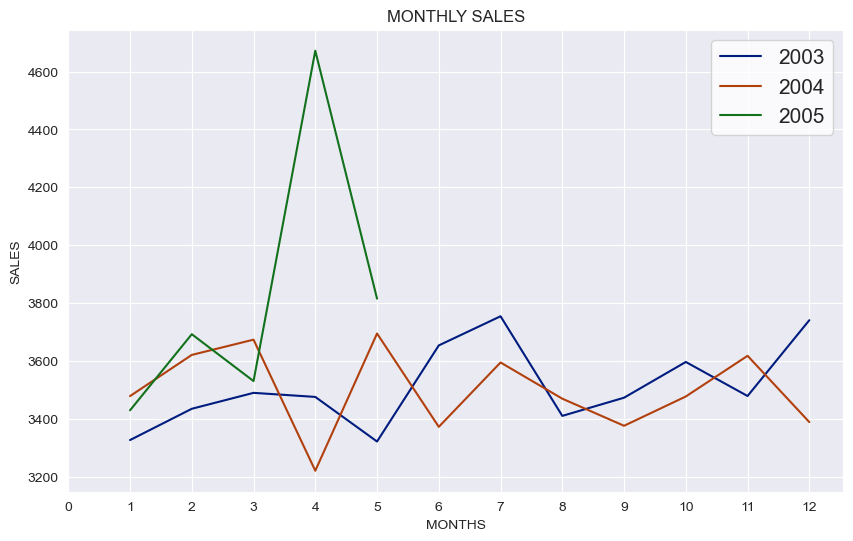

In [89]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

plt.title("MONTHLY SALES") # add title 

a= sns.lineplot(x='MONTH_ID',y='SALES',data=df,hue='YEAR_ID',palette='dark',errorbar=None,)
sns.set_style('whitegrid') # add white grid behind

plt.xlabel('MONTHS')
plt.ylabel('SALES')
plt.legend(prop={'size': 15})  # adjust the legend size

a.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])    # to specifically adjust x-axis
plt.show()

In [90]:
yearly_sales=df.groupby(['YEAR_ID'])['SALES'].sum().reset_index()
yearly_sales

,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


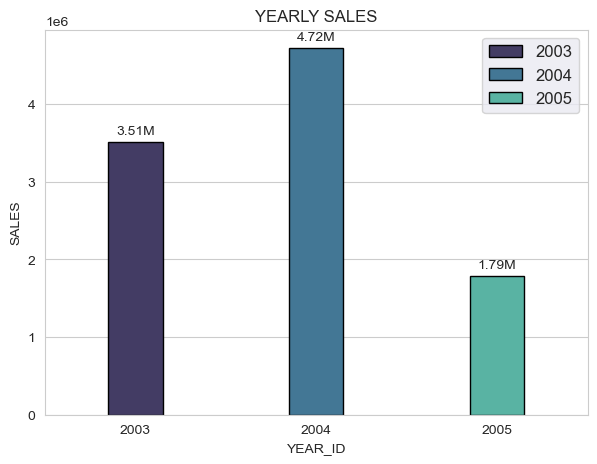

In [91]:
# Set the width and height of the figure
plt.figure(figsize=(7,5))

plt.title("YEARLY SALES") # add title 
plt.xlabel('YEARS')
plt.ylabel('SALES (IN MILLIONS)')

# main plotting of the bar chart
z= sns.barplot(x='YEAR_ID',y='SALES',data=yearly_sales,hue='YEAR_ID',palette='mako',edgecolor='black', dodge=False, width= 0.3)
sns.set_style('darkgrid') 

# to add labels to each bar in the bar chart 
tb = ['3.51M','4.72M','1.79M']
z.bar_label(z.containers[0], labels=tb, padding=3) # labelling the first bar with a distance of 3 from the bar
z.bar_label(z.containers[1], labels=tb, padding=3)
z.bar_label(z.containers[2], labels=tb, padding=3)


# adjust the legend size    
plt.legend(prop={'size': 12})
plt.show()

In [92]:
df.STATUS.value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [93]:
df['STATUS'] = df['STATUS'].replace(['Shipped','Cancelled','Resolved','On Hold','In Process','Disputed'],['1','0','0','0','0','0'])

In [94]:
df.STATUS.value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

In [95]:
label = df['STATUS']

In [96]:
df = df.drop(columns=['STATUS'])

In [97]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,...,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,...,Reims Collectables,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,...,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,...,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,...,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,4,12,2004,Ships,54,...,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,CA,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1,1,2005,Ships,54,...,"Oulu Toy Supplies, Inc.",Torikatu 38,Oulu,CA,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,1,3,2005,Ships,54,...,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,CA,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,1,3,2005,Ships,54,...,Alpha Cognac,1 rue Alsace-Lorraine,Toulouse,CA,31000,France,EMEA,Roulet,Annette,Small


In [98]:
df = pd.get_dummies(df)

In [99]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Classic Cars,...,CONTACTFIRSTNAME_Veysel,CONTACTFIRSTNAME_Victoria,CONTACTFIRSTNAME_Violeta,CONTACTFIRSTNAME_Wendy,CONTACTFIRSTNAME_William,CONTACTFIRSTNAME_Wing C,CONTACTFIRSTNAME_Yoshi,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,10107,30,95.70,2,2871.00,1,2,2003,95,0,...,0,0,0,0,0,0,0,0,0,1
1,10121,34,81.35,5,2765.90,2,5,2003,95,0,...,0,0,0,0,0,0,0,0,0,1
2,10134,41,94.74,2,3884.34,3,7,2003,95,0,...,0,0,0,0,0,0,0,0,1,0
3,10145,45,83.26,6,3746.70,3,8,2003,95,0,...,0,0,0,0,0,0,0,0,1,0
4,10159,49,100.00,14,5205.27,4,10,2003,95,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,4,12,2004,54,0,...,0,0,0,0,0,0,0,0,0,1
2819,10373,29,100.00,1,3978.51,1,1,2005,54,0,...,0,0,0,0,0,0,0,0,1,0
2820,10386,43,100.00,4,5417.57,1,3,2005,54,0,...,0,0,0,0,0,0,0,0,1,0
2821,10397,34,62.24,1,2116.16,1,3,2005,54,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
#Nguyễn Tấn Bảo_ 521H0438
#REQUIRE 2

In [101]:
from sklearn.preprocessing import StandardScaler

object = StandardScaler()

In [102]:
scaled_data = object.fit_transform(df)

In [103]:
# Create a new DataFrame with the scaled data
data_scaled = pd.DataFrame(scaled_data, columns = df.columns)

# Display the scaled DataFrame
print(data_scaled)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
0       -1.647947        -0.522891   0.596978        -1.057059 -0.370825   
1       -1.495888        -0.112201  -0.114450        -0.347015 -0.427897   
2       -1.354689         0.606505   0.549384        -1.057059  0.179443   
3       -1.235214         1.017195  -0.019759        -0.110334  0.104701   
4       -1.083154         1.427884   0.810158         1.783116  0.896740   
...           ...              ...        ...              ...       ...   
2818     0.991373        -1.549615   0.810158         2.019797 -0.711084   
2819     1.241185        -0.625563   0.810158        -1.293740  0.230579   
2820     1.382383         0.811850   0.810158        -0.583696  1.012024   
2821     1.501859        -0.112201  -1.061864        -1.293740 -0.780722   
2822     1.686503         1.222540  -0.899252         0.599710 -0.257637   

        QTR_ID  MONTH_ID   YEAR_ID      MSRP  PRODUCTLINE_Classic Cars  ...  \
0    -1.

In [104]:
from sklearn.model_selection import train_test_split


# Assuming your data is stored in a DataFrame called 'df_pca'
# Also assuming your labels are stored in a variable called 'label'
# You can replace these with the actual variable names if they're different

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=42)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression

# Mô hình Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_logistic = logistic_model.predict(X_test)

# Đánh giá hiệu suất
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy of Logistic Regression:", accuracy_logistic)

# Mô hình Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = random_forest_model.predict(X_test)

# Đánh giá hiệu suất
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)


# Mô hình Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Đánh giá hiệu suất
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Accuracy of Decision Tree:", accuracy_decision_tree)

#  mô hình Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = linear_reg_model.predict(X_test)

# Đánh giá hiệu suất bằng Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.9079646017699115
Accuracy of Random Forest: 0.984070796460177
Accuracy of Decision Tree: 0.9964601769911504
Mean Squared Error: 0.05979048787315731


Võ Gia Phong-521H0471

Require 3

1) Feed Forward Neural Network 

In [107]:
#Feedforward Neural Network
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.utils import to_categorical

# (reshape them into a 1D array)
FNN_Xtrain = X_train.values.reshape(X_train.shape[0], -1)
FNN_Xtest = X_test.values.reshape(X_test.shape[0], -1)
#one hot encode
FNN_Ytrain = to_categorical(y_train)
FNN_Ytest = to_categorical(y_test)
FNN_Xtrain.shape

(2258, 645)

In [128]:
# create model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(645,)))  # Lớp đầu tiên cần chỉ định kích thước đầu vào
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
model.build()
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 64)                41344     
                                                                 
 dense_72 (Dense)            (None, 32)                2080      
                                                                 
 dense_73 (Dense)            (None, 1)                 33        
                                                                 
Total params: 43457 (169.75 KB)
Trainable params: 43457 (169.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
# Train the model
model.fit(FNN_Xtrain, FNN_Ytrain, epochs=10, batch_size=10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 2)).


In [ ]:
# Evaluate the model
scores = model.evaluate(X_test, y_test)
print("Accuracy of Neural Network:", scores[1]*100.00)

2. Reccurent Neural Network 

In [135]:
# Reccurent Neural Network Classification

from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.layers import SimpleRNN

print(X_train[0])

modelRNN = Sequential()
modelRNN.add(SimpleRNN(64, activation='relu', input_shape=(645,)))  # Lớp đầu tiên cần chỉ định kích thước đầu vào
modelRNN.add(Dense(32, activation='relu'))
modelRNN.add(Dense(1, activation='sigmoid'))

KeyError: 0

In [132]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_25" is incompatible with the layer: expected shape=(None, 32, 1), found shape=(None, 645)


In [ ]:
model.summary()

In [ ]:
# Evaluate the model
scores = model.evaluate(X_test, y_test)
print("Accuracy of Neural Network:", scores[1]*100.00)